In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

In [3]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

resnet_model = ResNet50(weights="imagenet", include_top=False, input_shape=(200, 200, 3))

model = Sequential()
model.add(resnet_model)
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())
model.add(Dense(50))
model.add(Dropout(0.5))
model.add(Dense(18, activation="softmax"))
model.summary()   # 顯示模型摘要資訊

resnet_model.trainable = False

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 dropout (Dropout)           (None, 7, 7, 2048)        0         
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 50)                102450    
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 18)                918       
                                                        

In [5]:
model.load_weights("食物類別_200_200_best_model.h5")

In [6]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [7]:
import pandas as pd

#{'bawan': 0, 'beef_noodles': 1, 'braised_pork_over_rice': 2, 'bubble_tea': 3, 'coffin_toast': 4, 'deep-fried_chicken_cutlets': 5, 'grilled_taiwanese_sausage': 6, 'hot_sour_soup': 7, 'intestine_and_oyster_vermicelli': 8, 'milkfish_belly_congee': 9, 'oyster_omelet': 10, 'pig_s_blood_soup': 11, 'pineapple_cake': 12, 'potsticker': 13, 'rice_dumpling': 14, 'stinky_tofu': 15, 'taro_ball': 16, 'xiaolongbao': 17}
num_of_label = {'bawan': 0, 'beef_noodles': 1, 'braised_pork_over_rice': 2, 'bubble_tea': 3, 'coffin_toast': 4, 'deep-fried_chicken_cutlets': 5, 'grilled_taiwanese_sausage': 6, 'hot_sour_soup': 7, 'intestine_and_oyster_vermicelli': 8, 'milkfish_belly_congee': 9, 'oyster_omelet': 10, 'pig_s_blood_soup': 11, 'pineapple_cake': 12, 'potsticker': 13, 'rice_dumpling': 14, 'stinky_tofu': 15, 'taro_ball': 16, 'xiaolongbao': 17}


eng_ch_label_dict = pd.read_csv("食物分類_中英對照_18.csv", index_col=0, squeeze=True).to_dict()

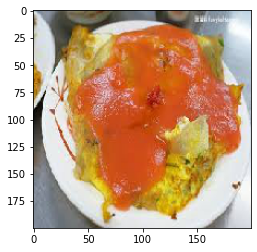

In [11]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

img_np = np.empty((1,200,200,3))

img = load_img("photo.jpg", target_size=(200, 200))
x = img_to_array(img)
plt.imshow(img)
img = x.reshape(1,x.shape[0],x.shape[1],x.shape[2])
img = preprocess_input(img)

img_np[0] = img

In [12]:
result = model.predict(img_np)
np.set_printoptions(formatter={'float': '{: 0.5f}'.format})
print("全部預測結果：")
print(result, end = "\n\n")

maxindex = np.argmax(result, axis = 1)
print("個別結果：")
for index, i in enumerate(maxindex):
    print("第" + str(index + 1) + "張：", end = "")
    key = [k for k, v in num_of_label.items() if v == maxindex][0]
    ch_key = eng_ch_label_dict[key]
    print(ch_key)

全部預測結果：
[[ 0.00580  0.00000  0.00000  0.00000  0.00096  0.00001  0.00000  0.00000
   0.00000  0.00000  0.99312  0.00000  0.00000  0.00010  0.00000  0.00000
   0.00000  0.00000]]

個別結果：
第1張：蚵仔煎
